# Lecture 3: GGPlot2 - plotnine
## ECON5170 Computational Methods in Economics
#### Author: Zhentao Shi
#### Date: June 2019

## Graphics

An English cliche says "One picture is worth ten thousand words".
John Tukey, a renowned mathematical statistician, was one of the pioneers of statistical graphs
in the computer era. Nowadays, powerful software is able to produce dazzling statistical graphs,
sometimes web-based and interactive. Outside of academia, journalism hooks a wide readership with
professional data-based graphs. New York Times and The Economists are first-rate examples;
South China Morning Post sometimes also does a respectable job.
A well designed statistical graph can deliver an intuitive and powerful message.
I consider graph prior to table when writing a research report or an academic paper.
Graph is lively and engaging. Table is tedious and boring.

We have seen an example of mathplotlib graph in the OLS regression linear example in Lecture 1.
`plot` is a generic command for graphs, and is one of the oldest libraries in Python for plotting.
It is capable of producing preliminary statistical graphs.

Over the years, developers all over the world have had many proposals for
more sophisticated statistical graphs. In my opinion, `ggplot2`, contributed by [Hadley Wickham](http://had.co.nz/),
is the best.

`ggplot2` is an advanced graphic system that generates high-quality statistical graphs.
It is not possible to cover it in a lecture. Fortunately, the author wrote a comprehensive reference
[**ggplot2 book**](http://link.springer.com/book/10.1007%2F978-0-387-98141-3),
which can be downloaded via the CUHK campus network (VPN needed).

The workflow of ggplot is to add the elements in a graph one by one, and then print out
the graph all together.
In contrast, `plot` draws the main graph at first, and then adds the supplementary elements later.

`ggplot2` is particularly good at drawing multiple graphs, either of the same pattern or of
different patterns. Multiple subgraphs convey rich information and easy comparison.

In Python, many libraries have established a solid reputation for plotting, for example: `matplotlib`, `seaborn`, `Altair` or even `ggplot` and `pandas`. But many people prefer the syntax and the "grammar of graphics" as in `ggplot2`, hence the trend goes to the package `plotnine` which is capable of data visualization like ggplot2 in R.

**Import necessary packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Import Plotnine
import plotnine as p9

# Please note, here we import plotnine as p9, because for some reason, 
# Python does not know how to interpret a custom theme without the prefix " p9." further 
# down this document. If you choose not to have a customized theme, you can import 
# plotnine as the following:
### from plotnine import *

from plotnine.data import mpg

# Import Daytime
import datetime

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-hul911mv because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


**Example**

Plot the density of two estimators under three different data generating processes.
This is an example to generate subgraphs of the same pattern.

In [2]:
mpg = p9.data.mpg
# Source: https://plotnine.readthedocs.io/en/stable/generated/plotnine.data.mtcars.html#plotnine.data.mtcars

In [3]:
# Import the data from pandas
mpg = p9.data.mtcars
print(mpg.shape)
mpg.head(5)

(32, 12)


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


/opt/conda/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


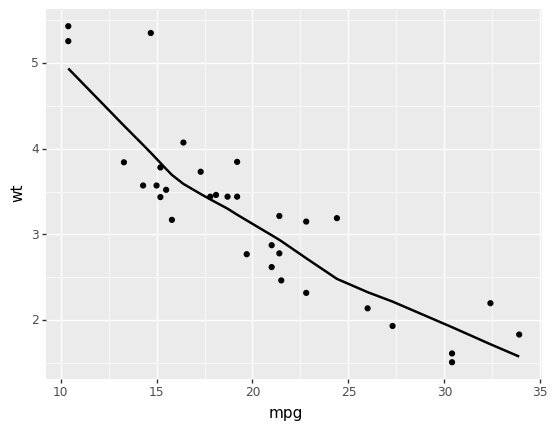

<ggplot: (8774876570345)>

In [4]:
# Scatterplot the mpg over model_years, with a regression line to 
# see the trend over the years
(p9.ggplot(data = mpg) +
 p9.aes(x = 'mpg', y = 'wt') +
 p9.geom_point() +
 p9.stat_smooth()
 )

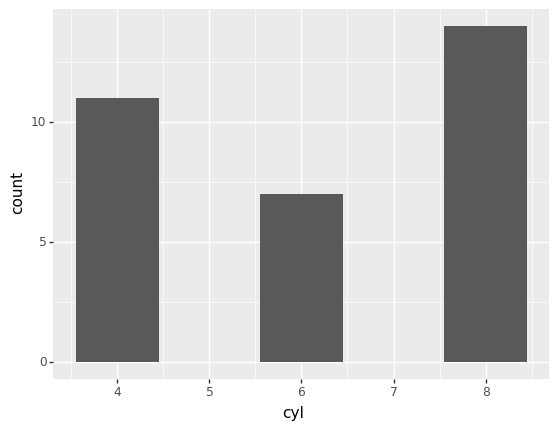

<ggplot: (8774876531565)>

In [5]:
(p9.ggplot(mpg) +
 p9.aes('cyl') +
 p9.geom_bar()
 )

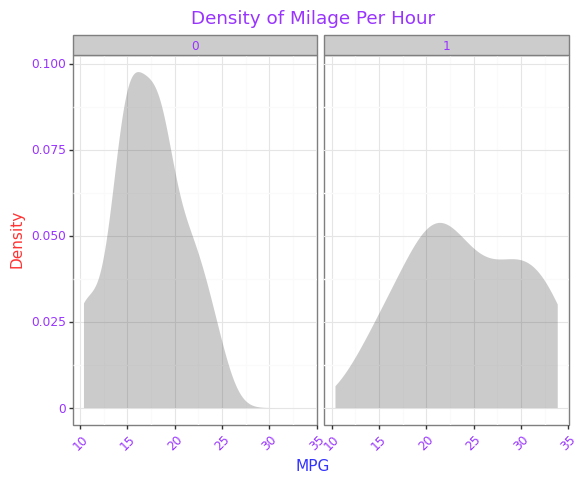

<ggplot: (8774867977030)>

In [6]:
(p9.ggplot(mpg) +
 p9.aes('mpg') +
 p9.geom_area(stat = "density", alpha = .25) +
 p9.facet_wrap('~am') +
 p9.theme_bw() +
 p9.labs(
     title='Density of Milage Per Hour',
     x = "MPG", 
     y = "Density"
 ) +
 p9.theme(
     text = p9.element_text(color='#9933FF'),
     axis_title = p9.element_text(),
     axis_title_x = p9.element_text(color='#3333FF'),
     axis_title_y = p9.element_text(color='#FF3333'),
     axis_text_x = p9.element_text(angle=45)
 ) 
)

The function `ggplot` specifies which dataset to use for the graph. `geom_***` determines the shape to draw, for example scatter dots, lines, curves or areas. `theme` is to tune the supplementary elements like the background, the size and font of the axis text and so on. A full list of API's can be found here:
https://plotnine.readthedocs.io/en/stable/api.html

### As far as I know, sub plots are not implemented yet.

**Example**

This example aligns two graphs of different patterns in one page.

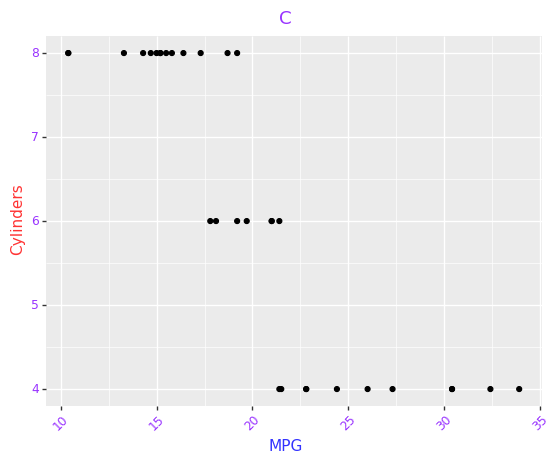

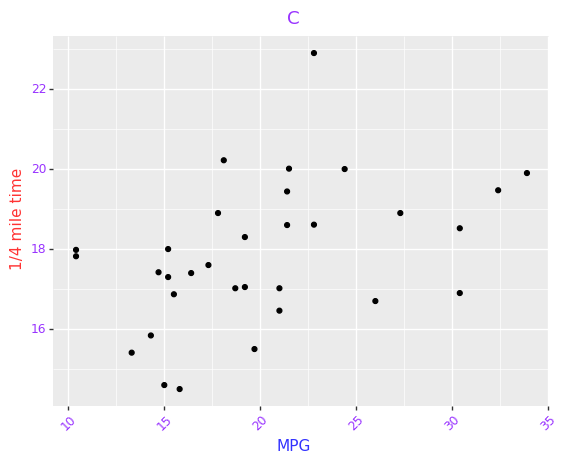

In [7]:
# unify the theme in the two graphs
custom_theme = p9.theme(
     text = p9.element_text(color='#9933FF'),
     axis_title = p9.element_text(),
     axis_title_x = p9.element_text(color='#3333FF'),
     axis_title_y = p9.element_text(color='#FF3333'),
     axis_text_x = p9.element_text(angle=45)
 )

# sub-graph 1
p1 = (p9.ggplot(mpg) +
      p9.aes(y = 'cyl', x ='mpg') +
      p9.geom_point() +
      p9.labs(
          title='C',
          x = "MPG", 
          y = "Cylinders"
          )
      )
p1 = p1 + custom_theme

# sug-graph 2
p2 = (p9.ggplot(mpg) +
      p9.aes(y = 'qsec', x ='mpg') +
      p9.geom_point() +
      p9.labs(
          title='C',
          x = "MPG", 
          y = "1/4 mile time"
          )
      )
p2 = p2 + custom_theme

print(p1)
print(p2)